<a href="https://colab.research.google.com/github/lalithasri07/dsa0216-ComputerVision/blob/main/Activity1_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Reshape image to feature vector
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# K-means segmentation (acts like simple segmentation layer)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3        # 3 segments
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented = centers[labels.flatten()]
segmented_image = segmented.reshape(img.shape)


(np.float64(-0.5), np.float64(381.5), np.float64(213.5), np.float64(-0.5))

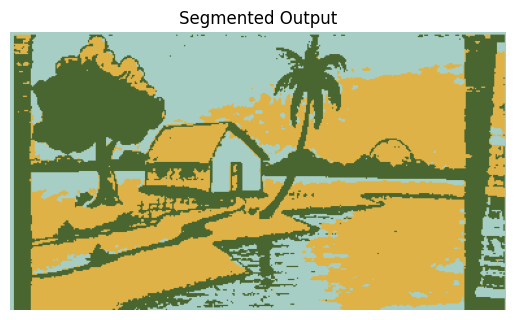

In [ ]:
plt.imshow(segmented_image)
plt.title("Segmented Output")
plt.axis('off')


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.3 MB/s eta 0:00:00


In [ ]:
from google.colab import files
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

uploaded = files.upload()
img_name = list(uploaded.keys())[0]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Saving image2.png to image2 (2).png


In [ ]:
from google.colab import files
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

uploaded = files.upload()
img_name = list(uploaded.keys())[0]


Saving imagesegmentation.png to imagesegmentation.png



image 1/1 /content/imagesegmentation.png: 512x640 6 persons, 2 dogs, 284.1ms
Speed: 6.8ms preprocess, 284.1ms inference, 23.6ms postprocess per image at shape (1, 3, 512, 640)


(np.float64(-0.5), np.float64(609.5), np.float64(461.5), np.float64(-0.5))

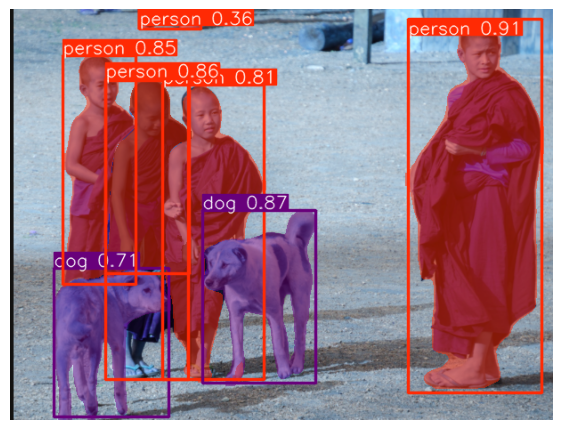

In [ ]:
model = YOLO("yolov8n-seg.pt")   # segmentation model

results = model(img_name)

# save result image
res_img = results[0].plot()

plt.figure(figsize=(7,7))
plt.imshow(res_img)
plt.axis('off')


In [ ]:
!pip install ultralytics torch torchvision


In [ ]:
from google.colab import files
uploaded = files.upload()
img_path = list(uploaded.keys())[0]


Saving imageactivity.jpg to imageactivity.jpg


In [ ]:
!pip install ultralytics


In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

uploaded = files.upload()
img_name = list(uploaded.keys())[0]


Saving imageeee.jpeg to imageeee.jpeg


In [ ]:
from ultralytics import YOLO
import numpy as np
import cv2

model = YOLO("yolov8n-seg.pt")

results = model(img_name)

# read original
img = cv2.imread(img_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, _ = img.shape

# blank canvas same size as original
mask_img = np.zeros((h, w, 3), dtype=np.uint8)

for r in results:
    if r.masks is not None:
        for mask in r.masks.data:

            # convert to numpy
            m = mask.cpu().numpy()

            # 👉 RESIZE MASK TO ORIGINAL IMAGE SIZE
            m = cv2.resize(m, (w, h))

            color = np.random.randint(0,255,3)

            for c in range(3):
                mask_img[:,:,c] = np.where(m > 0.5,
                                           color[c],
                                           mask_img[:,:,c])



image 1/1 /content/imageeee.jpeg: 448x640 4 persons, 229.8ms
Speed: 3.4ms preprocess, 229.8ms inference, 7.0ms postprocess per image at shape (1, 3, 448, 640)


(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

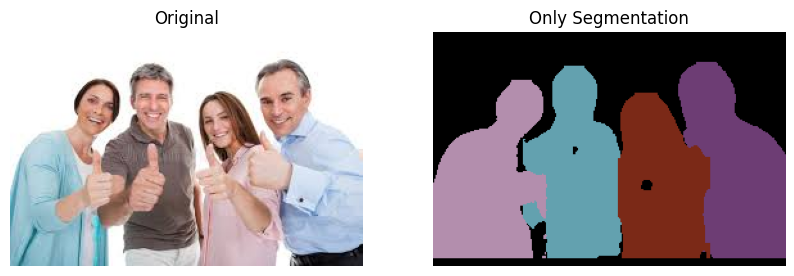

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(mask_img)
plt.title("Only Segmentation")
plt.axis('off')
